# Task 2

## Clustering Iris Data Using K-Means

First, let's import all the needed modeules and libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

now, we need to explore our data

In [4]:
iris_data = datasets.load_iris()
iris = pd.DataFrame(iris_data.data, columns= iris_data.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Apparently, our data is all continous and ready to be scaled.

In [7]:
#scale our data to give same importance to all features
mms = MinMaxScaler()
mms.fit(iris)
iris_scaled = mms.transform(iris)

After scaling, it's time to get our optimal k (number of clusters).

In [8]:
#we will set a range for k to check for best option in this range 
K = range(1,16)
#for each k we will initialize a k-means model and calculate sum of squared distances using inertia_ 
sq_dist = []
for k in K:
    km = KMeans(k)
    km.fit(iris_scaled)
    sq_dist.append(km.inertia_)
sq_dist

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[41.16611042137328,
 12.127790750538193,
 6.982216473785235,
 5.51693347204037,
 4.580948640117294,
 3.9248256390278486,
 3.4749657414092536,
 3.144366769187122,
 2.8067677838368854,
 2.540069361857268,
 2.273443273638064,
 2.195961543025901,
 2.0311703592769343,
 1.968693034267769,
 1.8060047340754666]

the less the squared distance the better but without unnecessary increasing the number of clusters, let's plot for better readability.

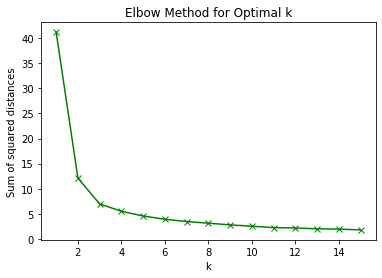

In [13]:
plt.plot(K, sq_dist, 'gx-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.show();

now it's more obvious, we will take the number of clusters at the elbow of the figure that will be the best or optimal k, here it is 3.

Now, let's build our model with the optimal k we got.


In [16]:
model = KMeans(3)
y = model.fit_predict(iris_scaled)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

And done, we got our predictions and optimal clusters right.